# Hurricane Damage Classification 

###  Import necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras import Sequential, layers

### Fetch the Dataset

In [2]:
damage = glob('damage/*.jpeg')
no_damage = glob('no_damage/*.jpeg')

### Check the no of images

In [3]:
print("Number of images in damage are:",len(damage))
print("Number of images in no_damage are:",len(no_damage))

Number of images in damage are: 1000
Number of images in no_damage are: 301


### Creating a list of images and labels

In [4]:
images = []
labels = []

for i in damage:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in no_damage:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

### Shuffle both images and labels

In [5]:
images, labels = shuffle(images,labels, random_state = 100)

### Plot few images

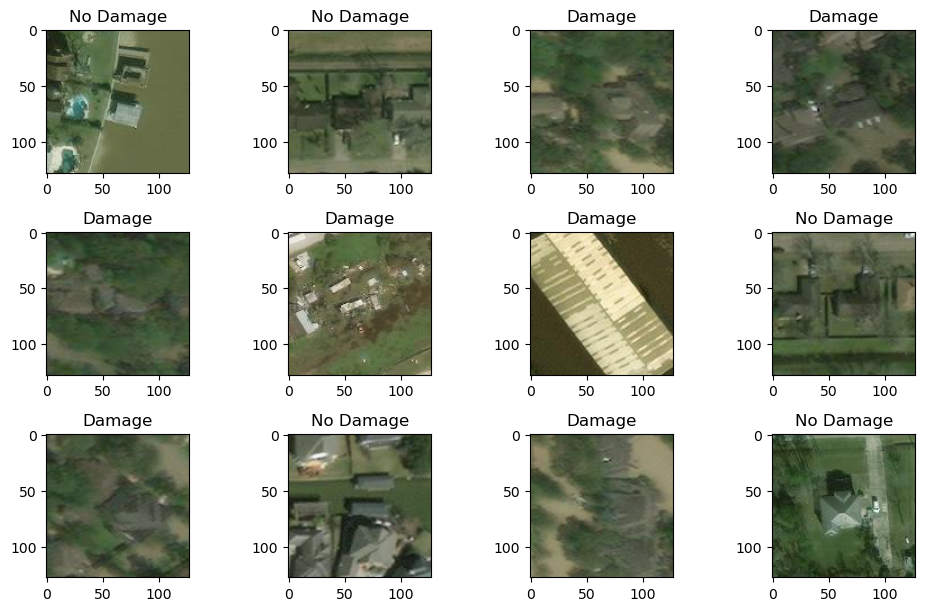

In [6]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    if labels[i] == 0:
        plt.title('Damage')
    else:
        plt.title('No Damage')
plt.tight_layout()

### The images maybe of diff sizes so lets us resize them to the same dimension

In [7]:
X = []
for i in images:
    X.append(resize(i,(150,150,3)))

### Plot some of the images after resizing

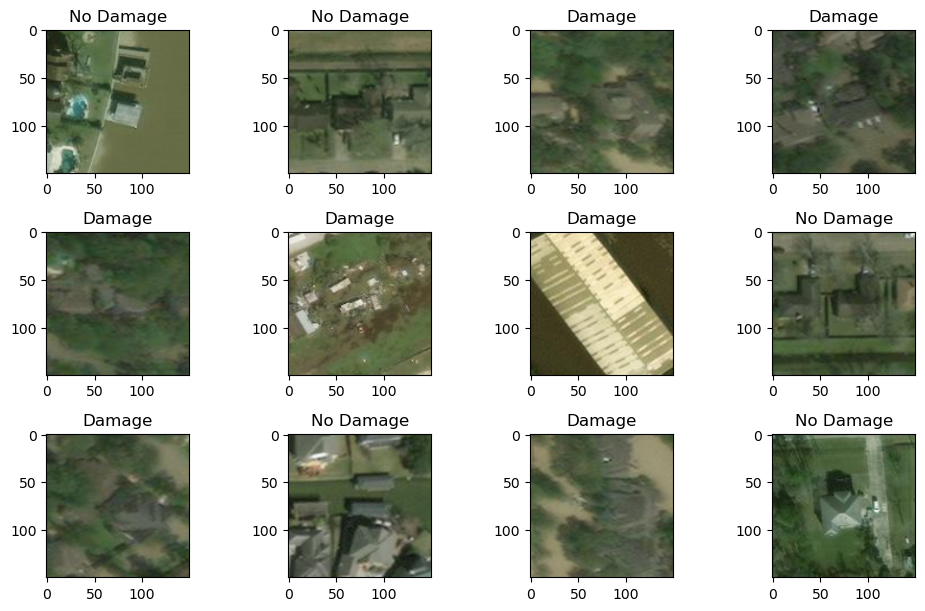

In [8]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    if labels[i] == 0:
        plt.title('Damage')
    else:
        plt.title('No Damage')
plt.tight_layout()

### Convert image and label datatypes from list to numpy arrays

In [9]:
X = np.array(X)
y = np.array(labels)

### Split into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier()

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

C:\Users\shrid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,654,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,659,425 (10.14 MB)

 Trainable params: 2,659,425 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the  model

In [15]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Train our model with x_train, y_train

In [16]:
model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.6817 - loss: 0.7475 - val_accuracy: 0.7452 - val_loss: 0.5539
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8235 - loss: 0.4395 - val_accuracy: 0.8510 - val_loss: 0.4322
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8888 - loss: 0.3134 - val_accuracy: 0.8125 - val_loss: 0.3732
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8970 - loss: 0.2678 - val_accuracy: 0.8077 - val_loss: 0.3947
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9005 - loss: 0.2603 - val_accuracy: 0.8510 - val_loss: 0.3397
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9653 - loss: 0.1371 - val_accuracy: 0.8558 - val_loss: 0.3502
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9645 - loss: 0.1186 - val_accuracy: 0.8510 - val_loss: 0.3438
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9832 - loss: 0.0713 - val_accuracy: 0.8221 - 

### Evaluate the model

In [17]:
model.evaluate(X_train,y_train)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9957 - loss: 0.0187 


[0.10918956995010376, 0.9750000238418579]

### Make predictions with X_test

In [18]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [19]:
pred = []

for i in y_pred:
    if i > 0.4:
        pred.append(0)
    else:
        pred.append(1)

### Plotting x_test along with label from our prediction

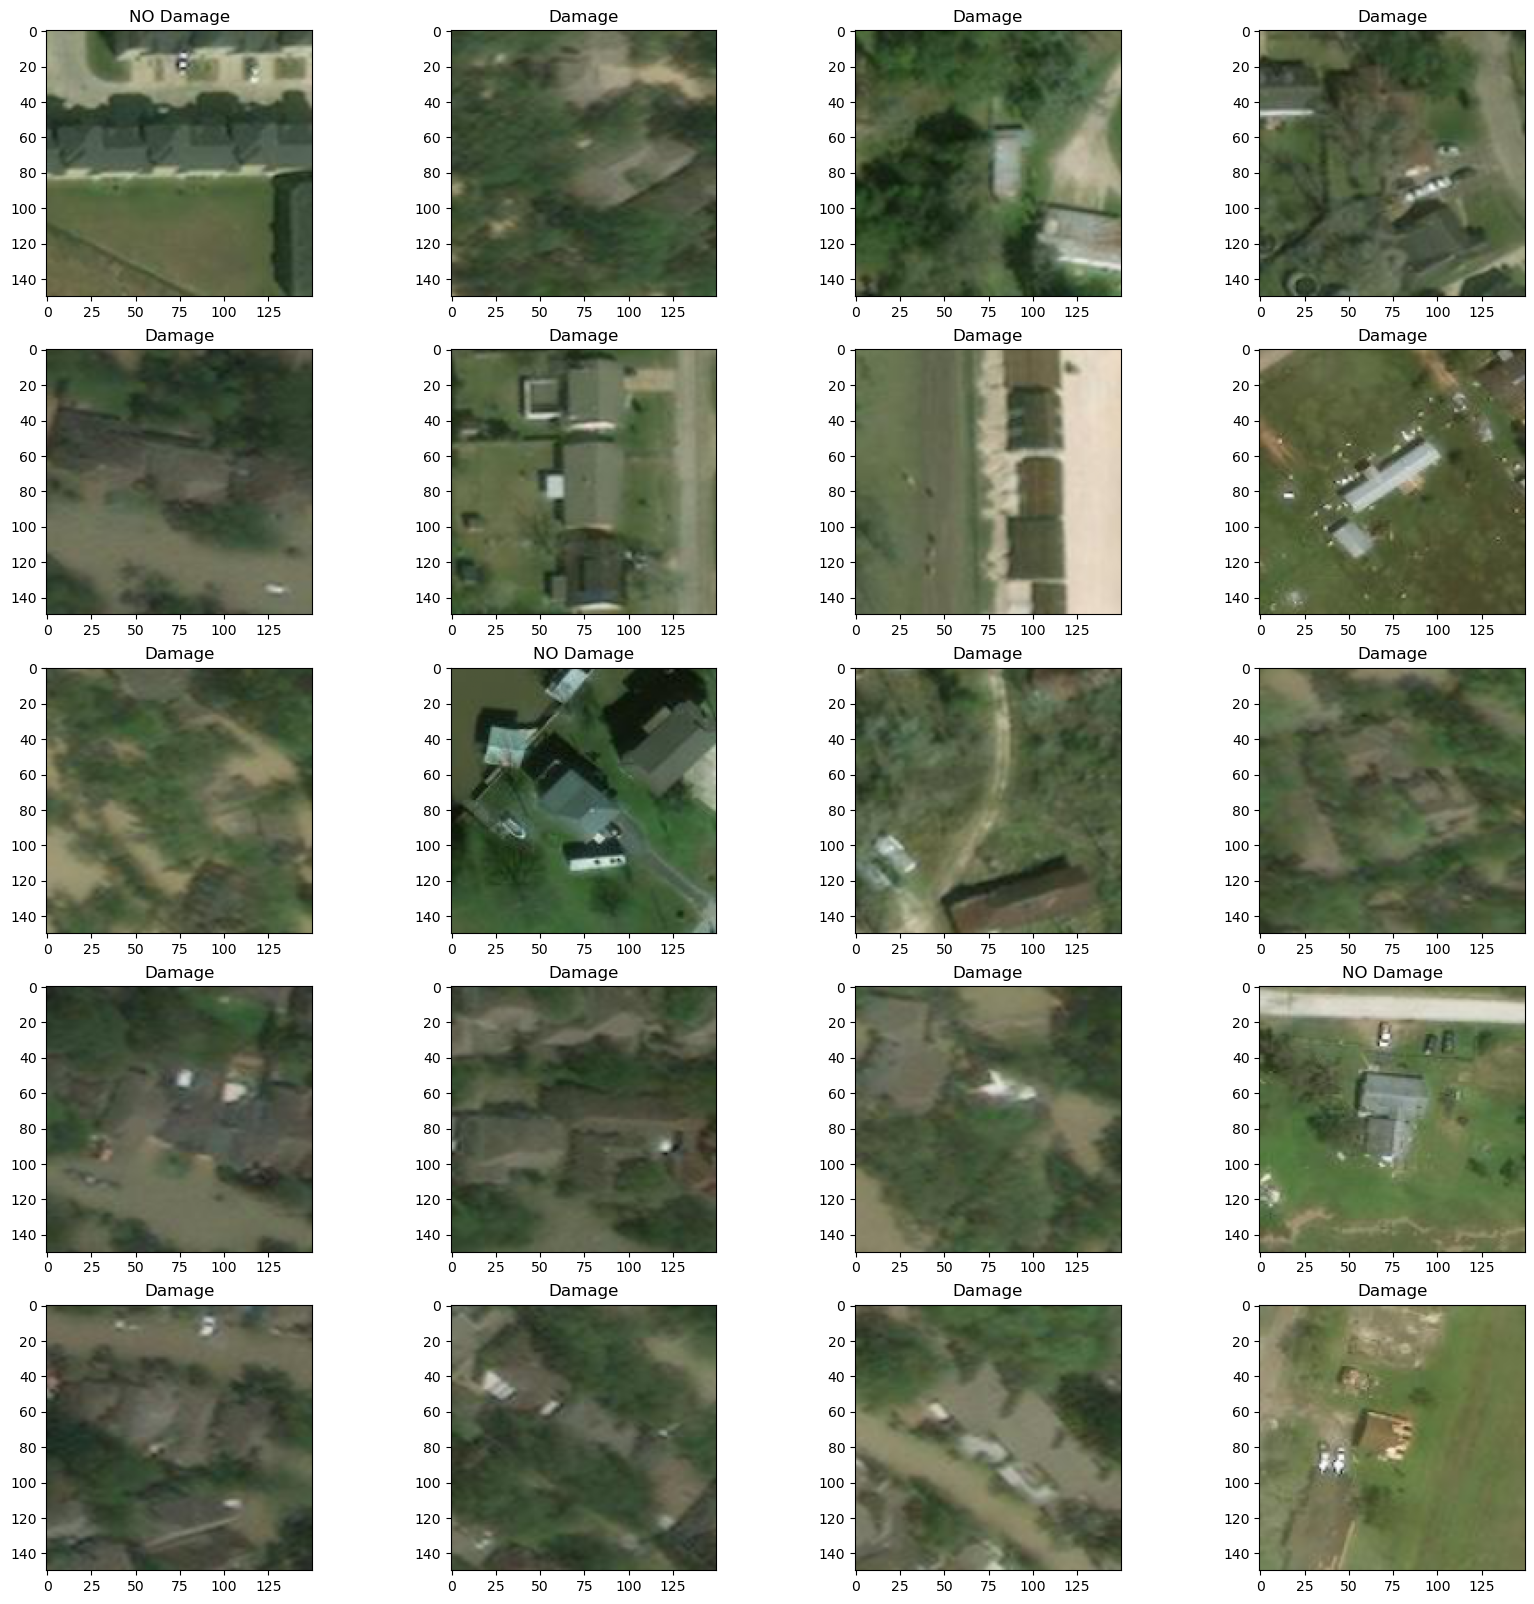

In [20]:
plt.figure(figsize = (20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('Damage')
    else:
        plt.title('NO Damage')

### Plot the Confusion Matrix

<Axes: >

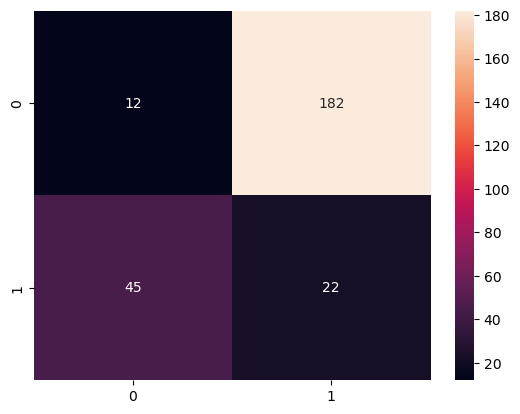

In [21]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

***